# Plots to Analyze the Baseline Training Process

In [1]:
import os
os.chdir("..")

## Plot Losses

In [16]:
from plotting.plot_utils import get_logtable, set_rc_params, plot_performance_over_time, plot_performance_comparison_over_time
from matplotlib import pyplot as plt
import pandas as pd
set_rc_params()

In [3]:
training_losses = get_logtable(database_name="fehring_growing_nn", table_name="hpo_baseline", logtable_name="training_losses")

2024-05-02 13:30:56,306  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-05-02 13:30:56,307  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-05-02 13:30:56,308  | py-experimenter - WARNING  | No values given for keyfield saved_neural_nets
2024-05-02 13:30:56,309  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-05-02 13:30:56,311  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-05-02 13:30:56,312  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-05-02 13:30:56,313  | py-experimenter - WARNING  | No values given for keyfield seed
2024-05-02 13:30:56,314  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-05-02 13:30:56,316  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-05-02 13:30:56,317  | py-experimenter - WARNING  | No values given for keyfield total_ti

2024-05-02 13:30:56,319  | py-experimenter - INFO     | Found 2 resultfields
2024-05-02 13:30:56,321  | py-experimenter - INFO     | Found 5 logtables
2024-05-02 13:30:56,321  | py-experimenter - INFO     | Found logtable hpo_baseline__configurations
2024-05-02 13:30:56,322  | py-experimenter - INFO     | Found logtable hpo_baseline__training_process
2024-05-02 13:30:56,323  | py-experimenter - INFO     | Found logtable hpo_baseline__smac_callbacks
2024-05-02 13:30:56,325  | py-experimenter - INFO     | Found logtable hpo_baseline__final_evaluation_callback
2024-05-02 13:30:56,326  | py-experimenter - INFO     | Found logtable hpo_baseline__training_losses
2024-05-02 13:30:56,327  | py-experimenter - WARNING  | No custom section defined in config
2024-05-02 13:30:56,328  | py-experimenter - WARNING  | No codecarbon section defined in config
2024-05-02 13:30:56,343  | py-experimenter - INFO     | Initialized and connected to database


In [4]:
training_losses.head()
training_losses["seed"] = training_losses["worker_number"].astype(int)

In [5]:
y_columns = ["entropy_loss", "policy_gradient_loss","value_loss", "explained_variance"]

/home/lukas/architectures-in-rl/plotting/plot_utils.py:417: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(
/home/lukas/architectures-in-rl/plotting/plot_utils.py:417: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(
/home/lukas/architectures-in-rl/plotting/plot_utils.py:417: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(
/home/lukas/architectures-in-rl/plotting/plot_utils.py:417: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(


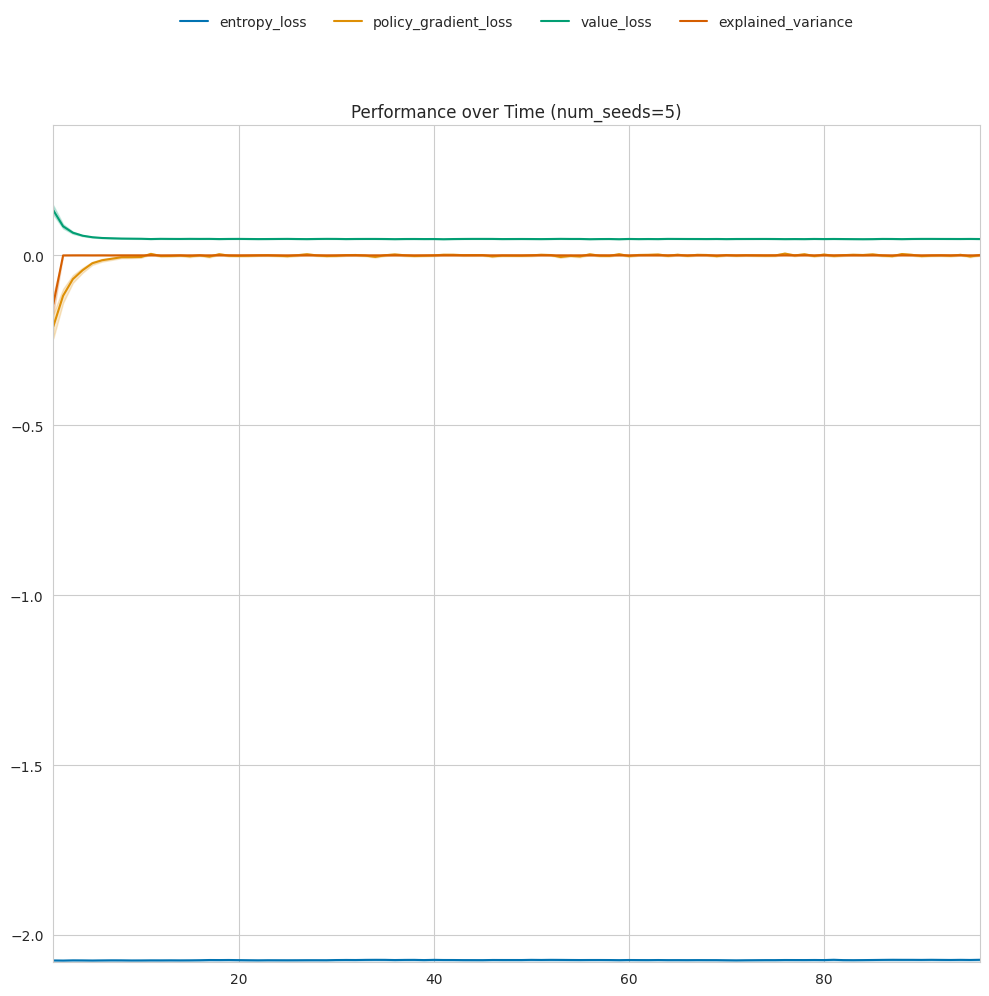

/home/lukas/architectures-in-rl/plotting/plot_utils.py:417: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(
/home/lukas/architectures-in-rl/plotting/plot_utils.py:417: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(
/home/lukas/architectures-in-rl/plotting/plot_utils.py:417: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(
/home/lukas/architectures-in-rl/plotting/plot_utils.py:417: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(


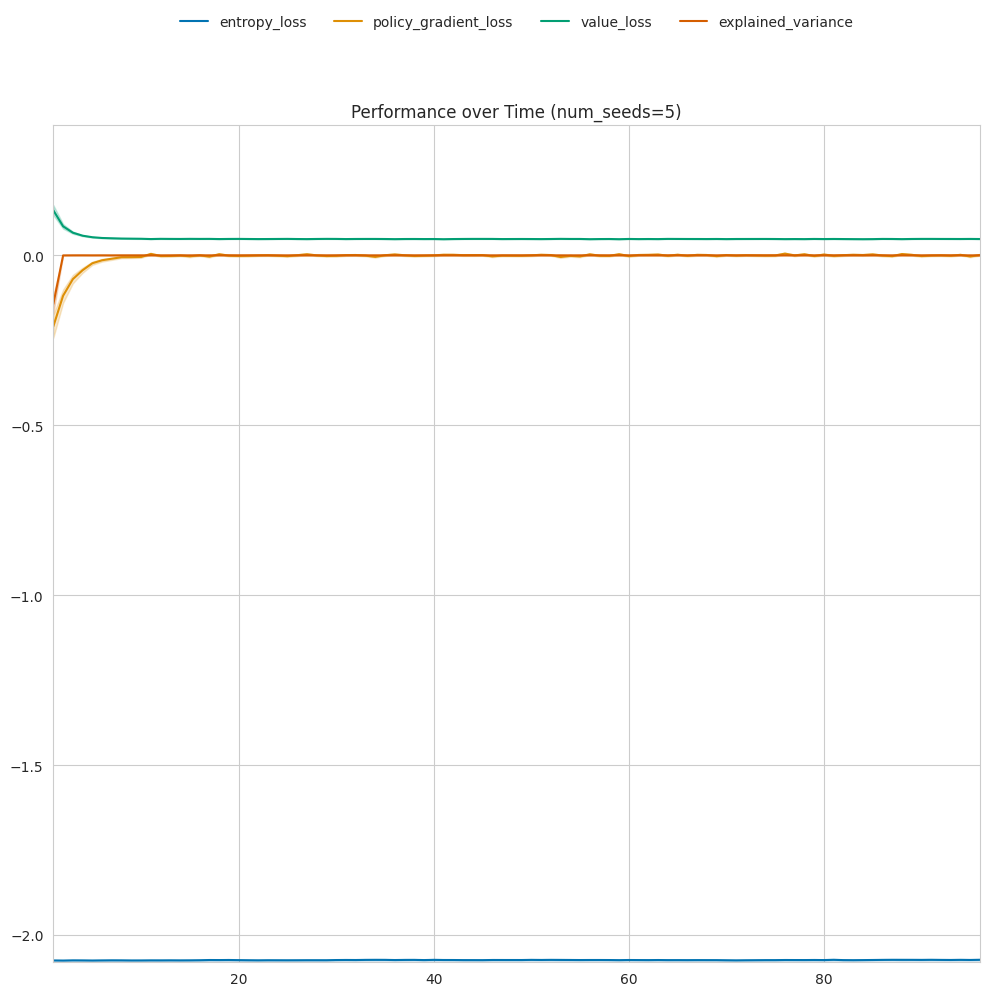

/home/lukas/architectures-in-rl/plotting/plot_utils.py:417: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(
/home/lukas/architectures-in-rl/plotting/plot_utils.py:417: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(
/home/lukas/architectures-in-rl/plotting/plot_utils.py:417: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(
/home/lukas/architectures-in-rl/plotting/plot_utils.py:417: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(


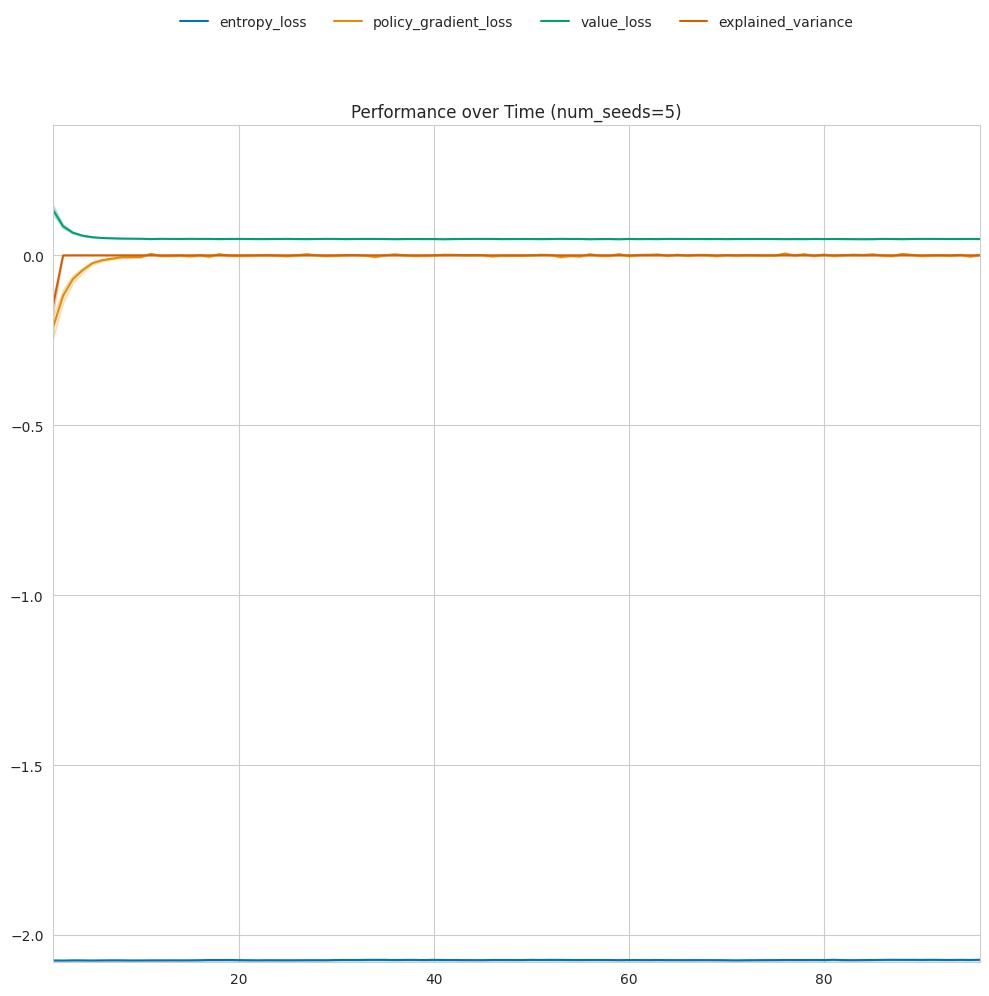

In [6]:
for trial_number in training_losses.trial_number.unique()[:3]:
    fig = plt.figure(figsize=(10, 10))
    relevant_df = training_losses[training_losses.trial_number == trial_number]
    plot_performance_comparison_over_time(training_losses, fig, x = "n_rollout", y_columns=y_columns)
    plt.show()

### Plot only Entropy Loss

/home/lukas/architectures-in-rl/plotting/plot_utils.py:281: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(


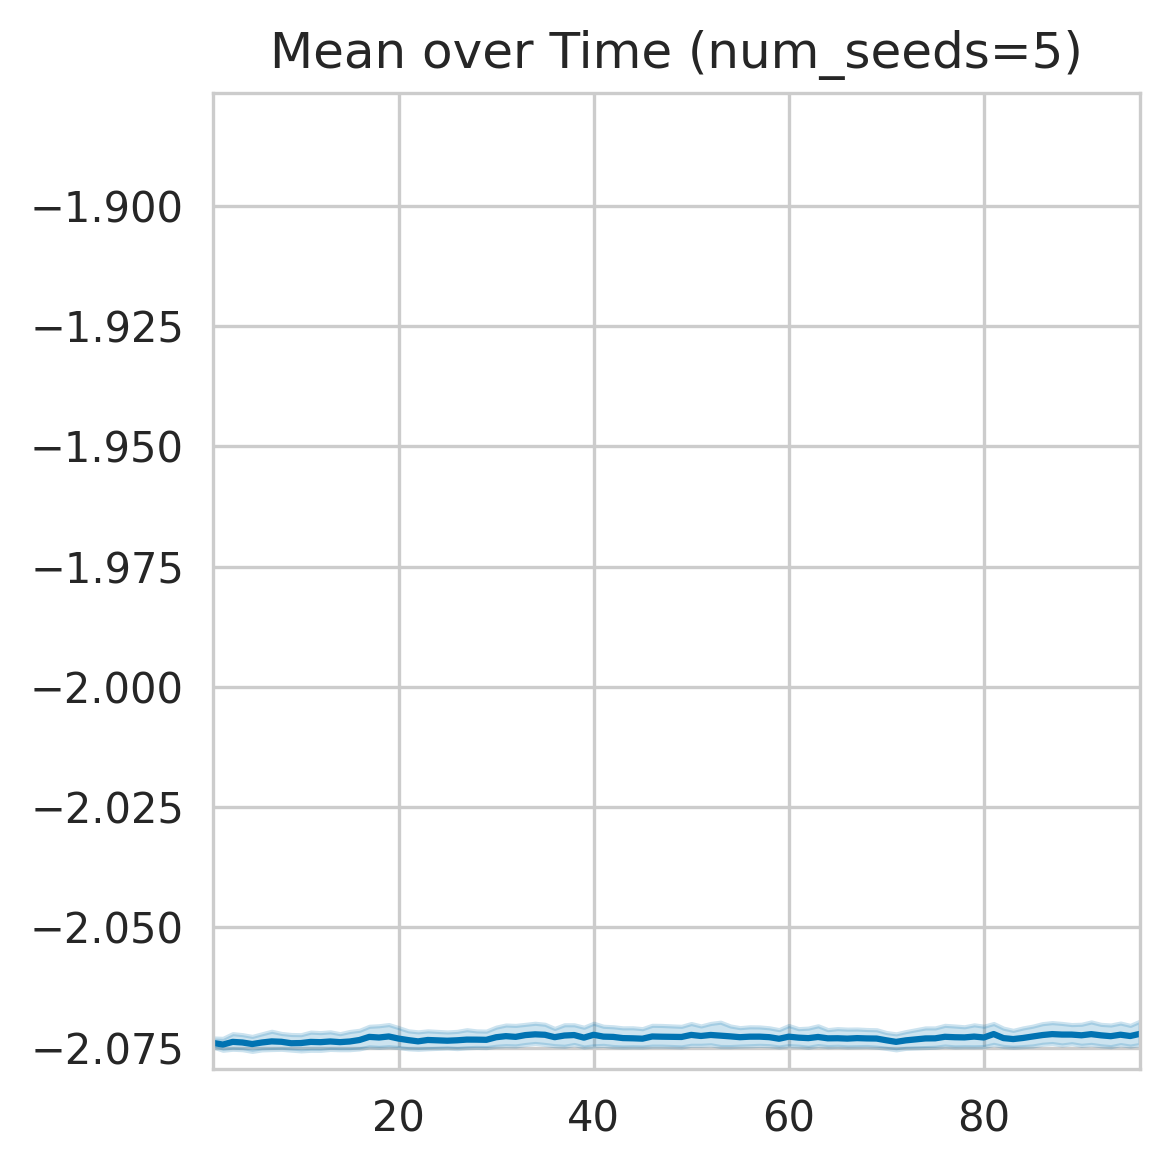

/home/lukas/architectures-in-rl/plotting/plot_utils.py:281: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(


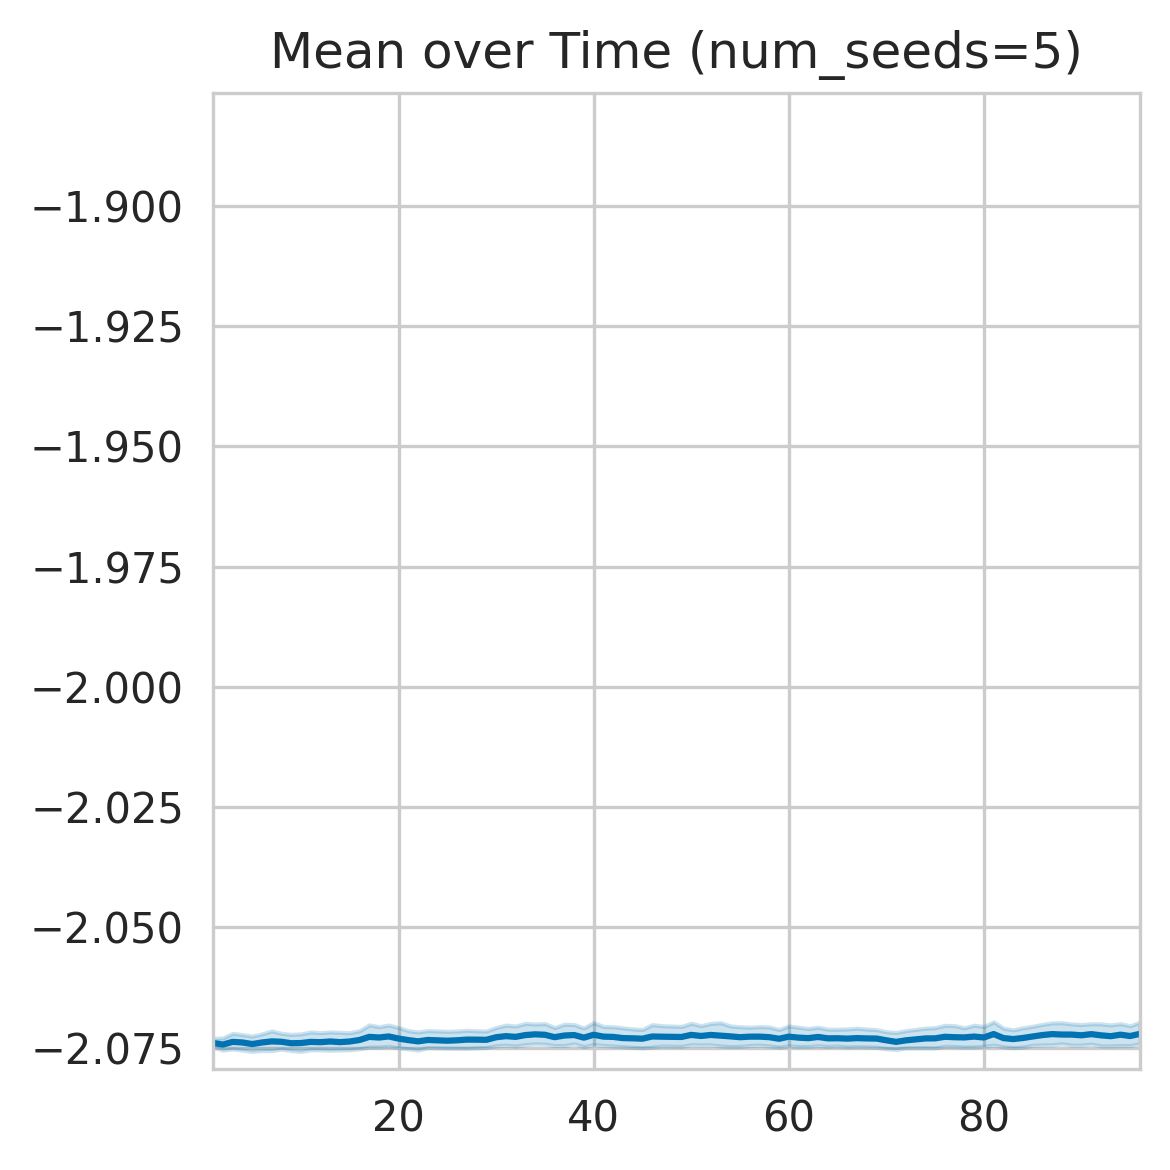

/home/lukas/architectures-in-rl/plotting/plot_utils.py:281: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(


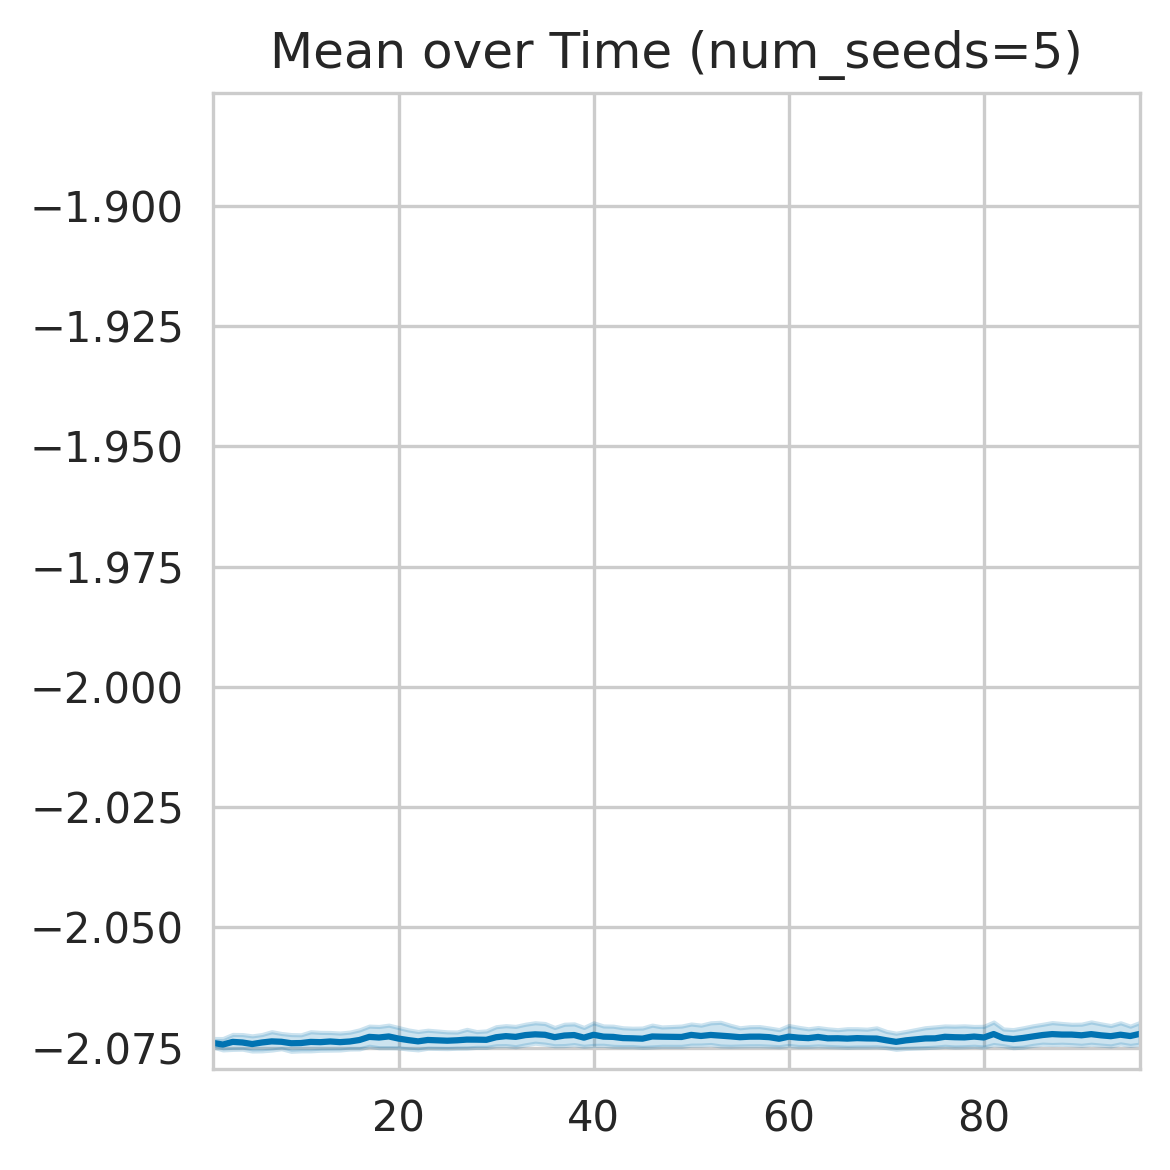

In [7]:
y = "entropy_loss"
for trial_number in training_losses.trial_number.unique()[0:3]:
    training_losses["seed"] = training_losses["worker_number"].astype(int)
    training_losses["entropy_loss"]
    plot_performance_over_time(training_losses, x = "n_rollout", y = "entropy_loss")
    plt.show()

## Plot Rewards by Trials

In [23]:
final_evaluation=get_logtable(database_name="fehring_growing_nn", table_name="hpo_baseline", logtable_name="final_evaluation_callback")
final_evaluation["seed"] = final_evaluation["worker_number"].astype(int)

2024-05-02 13:37:17,162  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-05-02 13:37:17,163  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-05-02 13:37:17,164  | py-experimenter - WARNING  | No values given for keyfield saved_neural_nets
2024-05-02 13:37:17,166  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-05-02 13:37:17,166  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps


2024-05-02 13:37:17,168  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-05-02 13:37:17,170  | py-experimenter - WARNING  | No values given for keyfield seed
2024-05-02 13:37:17,171  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-05-02 13:37:17,172  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-05-02 13:37:17,173  | py-experimenter - WARNING  | No values given for keyfield total_timesteps
2024-05-02 13:37:17,173  | py-experimenter - INFO     | Found 10 keyfields
2024-05-02 13:37:17,174  | py-experimenter - INFO     | Found 2 resultfields
2024-05-02 13:37:17,176  | py-experimenter - INFO     | Found 5 logtables
2024-05-02 13:37:17,177  | py-experimenter - INFO     | Found logtable hpo_baseline__configurations
2024-05-02 13:37:17,178  | py-experimenter - INFO     | Found logtable hpo_baseline__training_process
2024-05-02 13:37:17,179  | py-experimenter - INFO     | Found logt

In [25]:
final_evaluation.head()

,ID,experiment_id,timestamp,trial_number,worker_number,final_score,final_std,episode_lengths,average_episode_lengths,successfull,rewards_per_episode,seed
0,1,1,2024-04-30 15:16:50,0,3,-0.994,0.006633,"100,100,100,100,100,100,100,100,100,100",100.0,0.0,"[[-0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0...",3
1,2,1,2024-04-30 15:17:16,0,4,-0.985,0.012845,"100,100,100,100,100,100,100,100,100,100",100.0,0.0,"[[-0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0...",4
2,3,1,2024-04-30 15:18:10,0,0,-0.790,0.596825,"100,100,100,100,100,3,100,100,100,100",90.3,0.1,"[[0.0, 0.0, 0.0, 0.0, -0.01, -0.01, -0.01, -0....",0
3,4,1,2024-04-30 15:18:11,0,1,-0.993,0.011874,"100,100,100,100,100,100,100,100,100,100",100.0,0.0,"[[0.0, 0.0, 0.0, 0.0, -0.01, -0.01, -0.01, -0....",1
4,5,1,2024-04-30 15:18:24,0,2,-0.774,0.591459,"100,100,100,100,100,3,100,100,100,100",90.3,0.1,"[[-0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0...",2


/home/lukas/architectures-in-rl/plotting/plot_utils.py:281: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

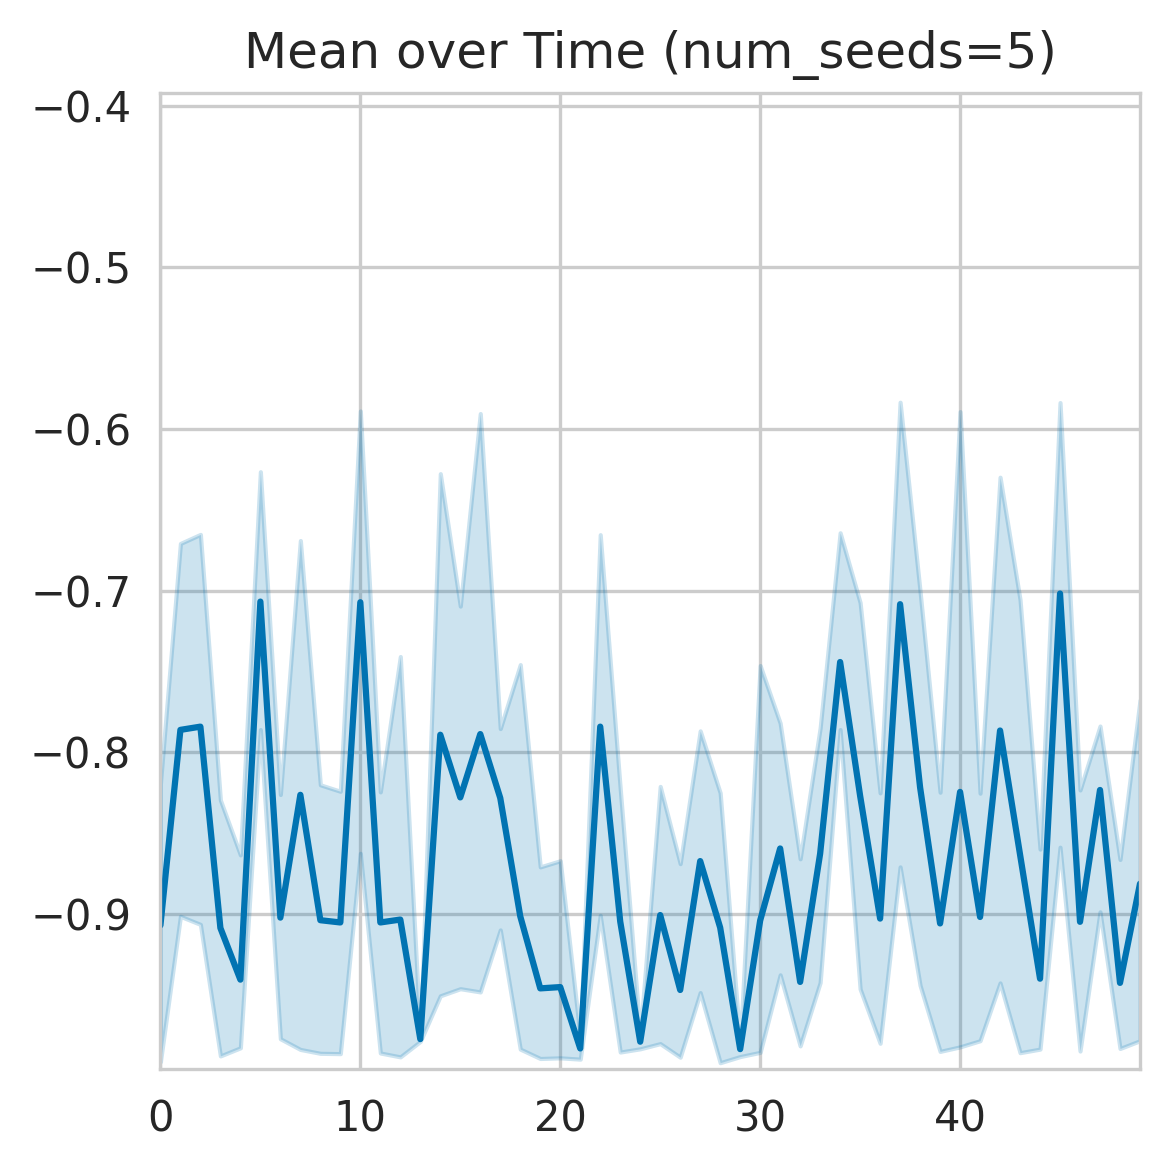

In [27]:
plot_performance_over_time(final_evaluation,x="trial_number", y="final_score")

/home/lukas/architectures-in-rl/plotting/plot_utils.py:281: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

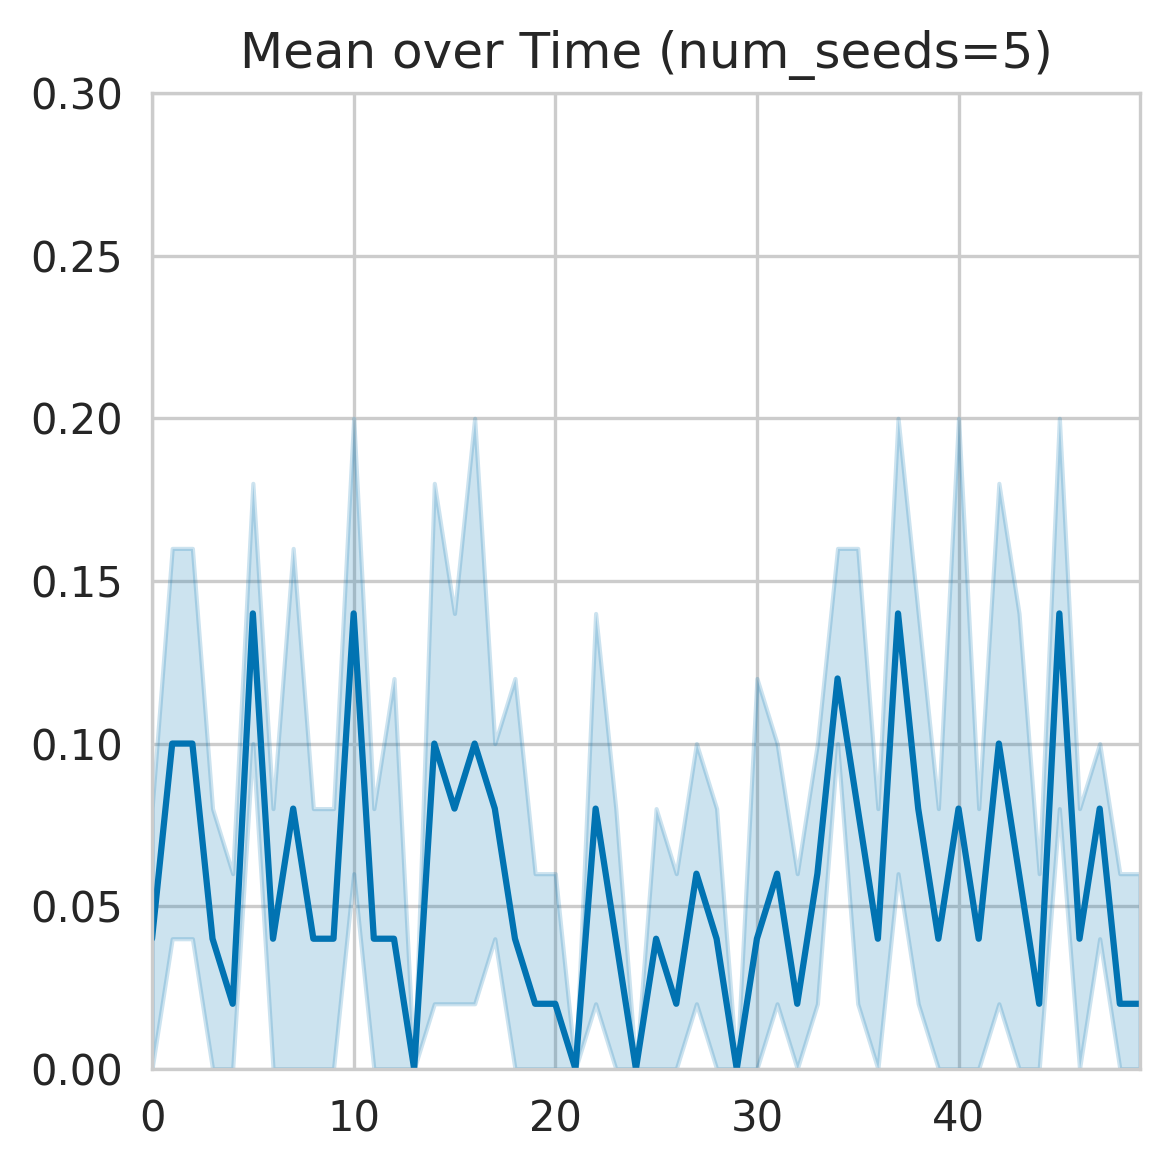

In [26]:
plot_performance_over_time(final_evaluation,x="trial_number", y="successfull")

## Plot Training Process

In [19]:
training_process = get_logtable(database_name="fehring_growing_nn", table_name="hpo_baseline", logtable_name="training_process")
training_process["seed"] = training_process["worker_id"].astype(int)

2024-05-02 15:42:56,230  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-05-02 15:42:56,231  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-05-02 15:42:56,232  | py-experimenter - WARNING  | No values given for keyfield saved_neural_nets
2024-05-02 15:42:56,233  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-05-02 15:42:56,234  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-05-02 15:42:56,235  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-05-02 15:42:56,237  | py-experimenter - WARNING  | No values given for keyfield seed
2024-05-02 15:42:56,238  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-05-02 15:42:56,240  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-05-02 15:42:56,241  | py-experimenter - WARNING  | No values given for keyfield total_ti

2024-05-02 15:42:56,265  | py-experimenter - INFO     | Initialized and connected to database


In [20]:
training_process.head()

,ID,experiment_id,timestamp,worker_id,trial_number,timestep,evaluated_cost,evaluated_stdev,seed
0,1,1,2024-04-30 15:16:49,3,0,250000,-0.784,0.594881,3
1,2,1,2024-04-30 15:16:49,3,0,500000,-0.581,0.790524,3
2,3,1,2024-04-30 15:16:49,3,0,750000,-0.783,0.594459,3
3,4,1,2024-04-30 15:16:49,3,0,1000000,-0.589,0.794587,3
4,5,1,2024-04-30 15:17:15,4,0,250000,-0.985,0.015652,4


In [21]:
training_process = training_process[training_process["experiment_id"] == 1]

In [31]:
fig = plt.figure(figsize=(10, 10))
final_df = {"timestep": training_process["timestep"].unique()}
for trial_number in training_process.trial_number.unique():
    final_df[f"trial_{trial_number}"] = []
    final_df[f"trial_{trial_number}_seed"] = []
    for seed in training_process.seed.unique():
        relevant_df = training_process[(training_process.trial_number == trial_number) & (training_process.seed == seed)]
        final_df[f"trial_{trial_number}"] += list(relevant_df["evaluated_cost"])
        final_df[f"trial_{trial_number}_seed"] += [seed] * len(relevant_df["evaluated_cost"])
        
{key: len(value) for key, value in final_df.items()}

{'timestep': 4,
 'trial_0': 20,
 'trial_0_seed': 20,
 'trial_1': 20,
 'trial_1_seed': 20,
 'trial_2': 20,
 'trial_2_seed': 20,
 'trial_3': 20,
 'trial_3_seed': 20,
 'trial_4': 20,
 'trial_4_seed': 20,
 'trial_5': 20,
 'trial_5_seed': 20,
 'trial_6': 20,
 'trial_6_seed': 20,
 'trial_7': 20,
 'trial_7_seed': 20,
 'trial_8': 20,
 'trial_8_seed': 20,
 'trial_9': 20,
 'trial_9_seed': 20,
 'trial_10': 20,
 'trial_10_seed': 20,
 'trial_11': 20,
 'trial_11_seed': 20,
 'trial_12': 20,
 'trial_12_seed': 20,
 'trial_13': 20,
 'trial_13_seed': 20,
 'trial_14': 20,
 'trial_14_seed': 20,
 'trial_15': 20,
 'trial_15_seed': 20,
 'trial_16': 20,
 'trial_16_seed': 20,
 'trial_17': 20,
 'trial_17_seed': 20,
 'trial_18': 20,
 'trial_18_seed': 20,
 'trial_19': 20,
 'trial_19_seed': 20,
 'trial_20': 20,
 'trial_20_seed': 20,
 'trial_21': 20,
 'trial_21_seed': 20,
 'trial_22': 20,
 'trial_22_seed': 20,
 'trial_23': 20,
 'trial_23_seed': 20,
 'trial_24': 20,
 'trial_24_seed': 20,
 'trial_25': 20,
 'trial_25_s

<Figure size 1000x1000 with 0 Axes>